In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Fraud.csv")

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.isnull().values.any()

False

In [7]:
Flagged_Fraud = data.loc[data['isFlaggedFraud'] == 1.0]
No_Flagged_Fraud = data.loc[data['isFlaggedFraud'] == 0.0]

In [8]:
len(Flagged_Fraud)

16

In [9]:
len(No_Flagged_Fraud)

6362604

In [10]:
Fraud = data.loc[data['isFraud'] == 1.0]
No_Fraud = data.loc[data['isFraud'] == 0.0]

In [11]:
len(Fraud)

8213

In [12]:
len(No_Fraud)

6354407

In [13]:
print('\n The types of fraudulent transactions are {}'.format(\
    list(data.loc[data.isFraud == 1].type.drop_duplicates().values)))

dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout)))


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


### 1. *Data Cleaning*

##### From the exploratory data analysis (EDA), We know that fraud only occurs in 'TRANSFER's and 'CASH_OUT's. So we assemble only the corresponding data in X for analysis.

In [14]:
X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

In [15]:
randomState = 5
np.random.seed(randomState)

In [16]:
Y = X['isFraud']
del X['isFraud']

In [17]:
# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

In [18]:
# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1

# convert dtype('O') to dtype(int)
X.type = X.type.astype(int)

### *Missing Values*

##### The data has several transactions with zero balances in the destination account both before and after a non-zero amount is transacted. The fraction of such transactions, where zero likely denotes a missing value, is much larger in fraudulent (50%) compared to genuine transactions (0.06%).

In [19]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldbalanceDest\' = \
\'newbalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldbalanceDest\' = \
newbalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldbalanceDest' = 'newbalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldbalanceDest' = newbalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


##### Since the destination account balances being zero is a strong indicator of fraud, We replace the value of 0 with -1 which will be more useful to a suitable machine-learning (ML) algorithm detecting fraud.

In [20]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

##### The data also has several transactions with zero balances in the originating account both before and after a non-zero amount is transacted. In this case, the fraction of such transactions is much smaller in fraudulent (0.3%) compared to genuine transactions (47%). Once again, from similar reasoning as above, instead of imputing a numerical value we replace the value of 0 with a null value.

In [21]:
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldbalanceOrig', 'newbalanceOrig']] = np.nan


### Data visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
type = data['type'].value_counts()
transaction = type.index
count = type.values

##### Drawing PieChart

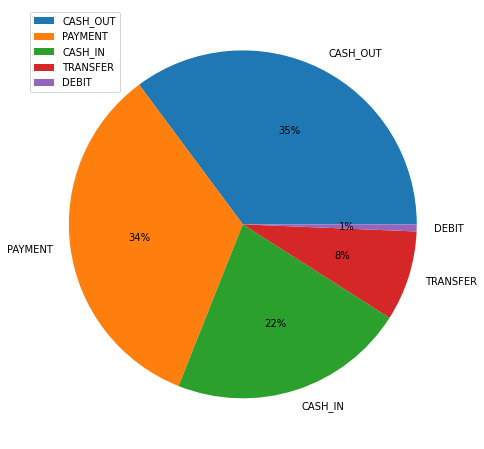

In [24]:
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

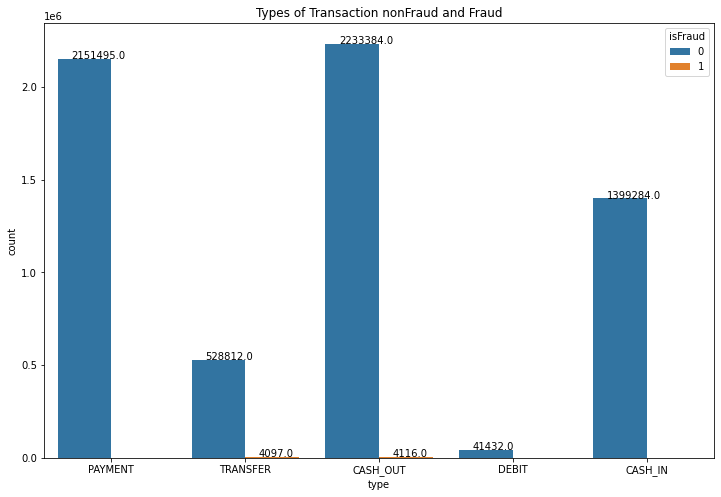

In [25]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = data)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Transaction types TRANSFER and CASH_OUT only have FRAUD Transactions.

DEBIT Transactions are only few and TRANSFER type Transactions are also less compared to other type of transactions.

No of Fraud transactions of TRANSFER type are very close to No of CASH_OUT FRAUD transactions.

In [26]:
data1=data[(data['isFraud']==1) & (data['type']=='TRANSFER')]
data1['nameDest'].value_counts()

C553264065     1
C988859148     1
C1287650869    1
C922180689     1
C131895413     1
              ..
C776246900     1
C1234144009    1
C571016162     1
C1381364691    1
C2080388513    1
Name: nameDest, Length: 4097, dtype: int64

In [27]:
data2=data[(data['isFraud']==1) & (data['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()

C840083671     1
C1055498407    1
C1886113938    1
C520336445     1
C463684846     1
              ..
C1641368956    1
C2120940829    1
C992121519     1
C1663597987    1
C1280323807    1
Name: nameOrig, Length: 4116, dtype: int64

There are no specific accounts from which fraud transactions are carried out . Hence we disregard our suspicioun. So these account name features are not useful for us in modelling as is.

### Let's check further

In [28]:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

In [29]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

In [30]:
# checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

For fraudulent transactions, the account that received funds during a transfer was not used at all for cashing out.

We derive a new feature Transaction Type2 from these features account types "C" (customer) and "M" (merchant), which would be the first character for each value under nameOrig and nameDest.

We will create a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [31]:
# adding feature type1
data_new = data.copy() # creating copy of dataset in case I need original dataset
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"Type2"] = "MM"

### Plotting Pairplot

Visualizing Numeric variables against Fraud using Boxplots.

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

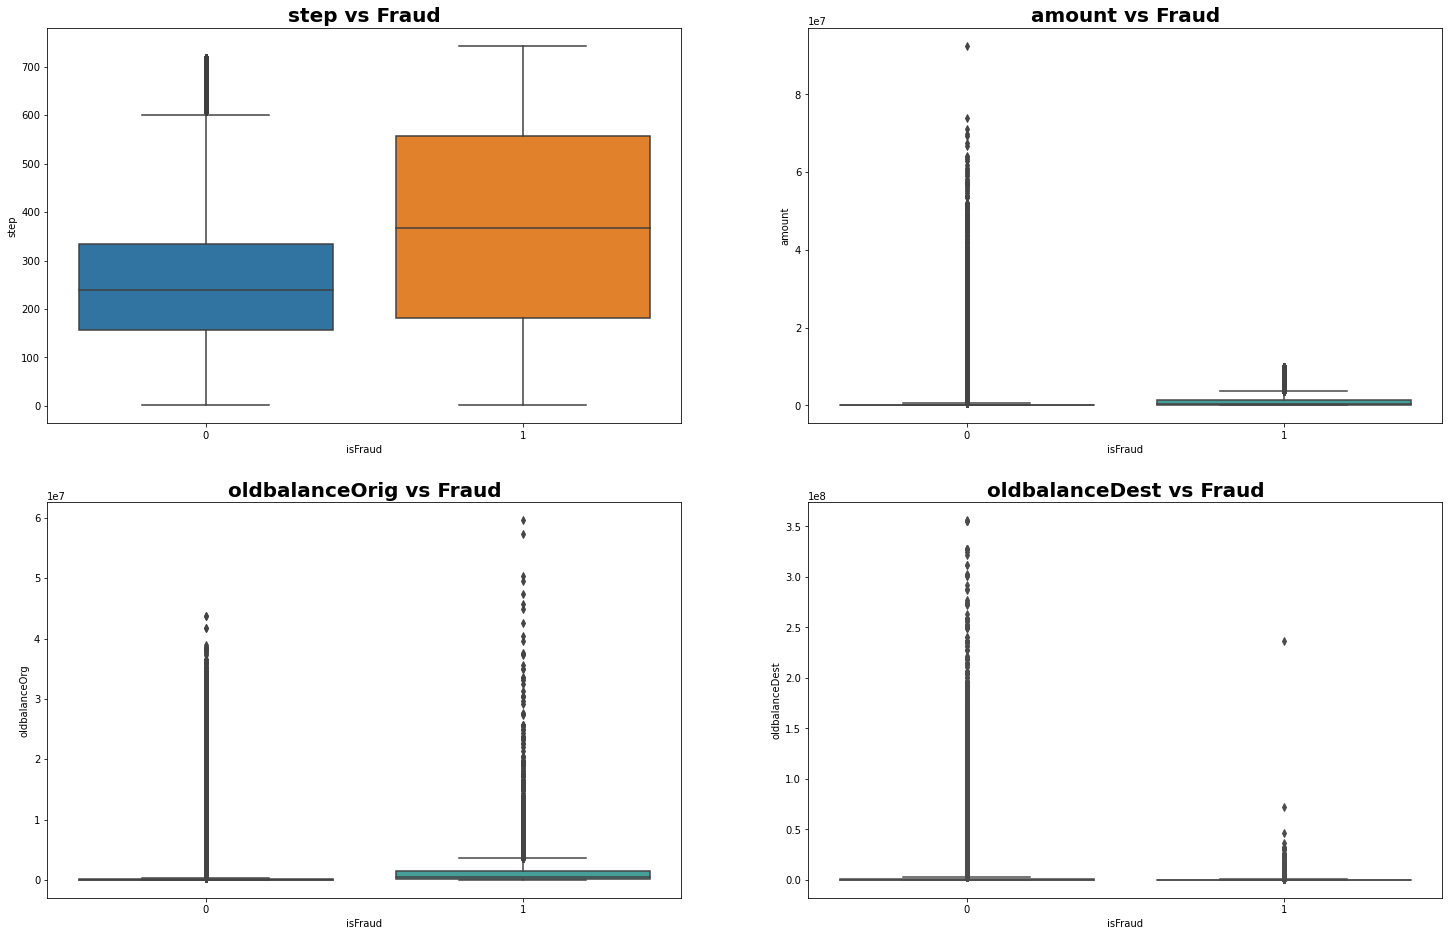

In [32]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

Median amount for fraud transactions is greater than Non Fraud transactions.

Balance in Origin account in Fraud transactions before transaction is greater than Balance in Origin account of Non Fraud transactions.

In [33]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [34]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 CC    8213
Name: Type2, dtype: int64

 Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: Type2, dtype: int64


From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer).

Looking balances before and after the transaction

In [35]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["newbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


Most, if not all, of the observations have errors in calculating the balances before and after the transaction.

Since We don't know why these errors are caused, We cannot treat them.

We will not process them and use them as is for our modelling purpose.

Looking at Time

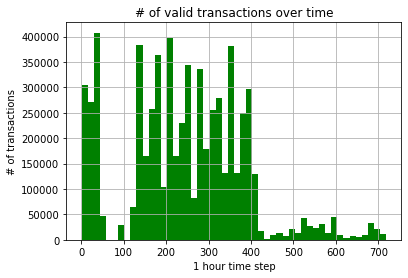

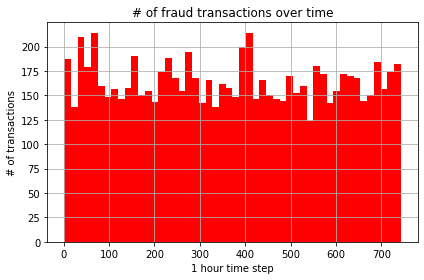

In [36]:
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th time-steps.

The frequency at which fraudulent transactions occur does not seem to change much over time.

Let's see what the patterns look like over any particular, day of the week or hour of the day.

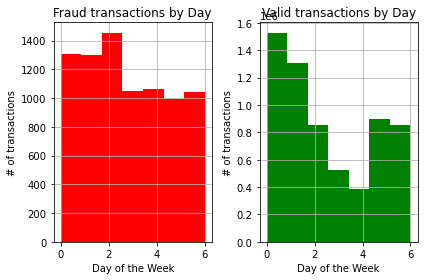

In [37]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

From the graphs above, there is little evidence to suggest that fraudulent transactions occur at particular days of the week.

While valid transactions occur less on some two consecutive days of the week.

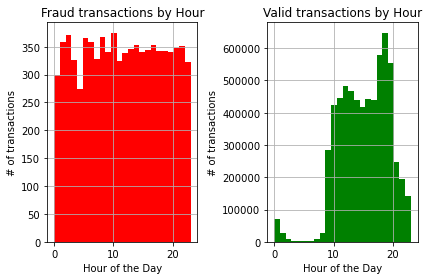

In [38]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

We observe that from hour 0 to hour 9 valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 .

In response to this, We will create another feature HourOfDay, which is the step column with each number taken to modulo 24.

In [39]:
data_new["HourOfDay"] = np.nan # initializing feature column
data_new.HourOfDay = data_new.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(data_new))

Head of dataset1: 
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud Type2  \
0  M1979787155             0.0             0.0        0               0    CM   
1  M2044282225             0.0             0.0        0               0    CM   
2   C553264065             0.0             0.0        1               0    CC   
3    C38997010         21182.0             0.0        1               0    CC   
4  M1230701703             0.0             0.0        0               0    CM   

   HourOfDay  
0          1  
1          1

We will drop columns irrelevant for our modelling. These are isFlaggedFraud, nameOrig, nameDest columns.

In [40]:
data_new = data_new.drop(["isFlaggedFraud",'nameOrig','nameDest'],1)

C:\Users\aswan\AppData\Local\Temp\ipykernel_20016\2267214257.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_new = data_new.drop(["isFlaggedFraud",'nameOrig','nameDest'],1)


Handling Categorical Variables

In [41]:
data_new = pd.get_dummies(data_new,prefix=['type','Type2'],drop_first=True)

Train-Test Split Standardizing Data

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [43]:
X = data_new.drop("isFraud",1)
y = data_new.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

C:\Users\aswan\AppData\Local\Temp\ipykernel_20016\4116312190.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_new.drop("isFraud",1)


## 2. Model Selection

Non-parametric machine learning methods may be preferred due to the large size of the data and that the goal is accurate classification, not interpretation

### Performing Undersampling of Train Data

We undersample training data as when we trained classifiers with entire training data all classifiers except RandomForest and Neural Networks classified all points as non-Fraud and failed to detect any Fraud transaction

Our training data is in millions so models will still learn train data well as the undersampled data will still contain enough number of transactions

In [44]:
!pip install imblearn

In [45]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)

In [46]:
X_res, y_res = rus.fit_resample(X_train, y_train)

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )

In [49]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_LR)
print("Classification Report:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9764587544124904
Confusion Matrix:
 [[1551985   36562]
 [    884    1224]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1588547
           1       0.03      0.58      0.06      2108

    accuracy                           0.98   1590655
   macro avg       0.52      0.78      0.52   1590655
weighted avg       1.00      0.98      0.99   1590655

Confusion Matrix Train:
 [[4656737  109123]
 [   2614    3491]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   4765860
           1       0.03      0.57      0.06      6105

    accuracy                           0.98   4771965
   macro avg       0.52      0.77      0.52   4771965
weighted avg       1.00      0.98      0.99   4771965

Precision: 0.03239294976975599
Recall: 0.5806451612903226
F1: 0.06136261091893517
Area under precision (AUC) Recall: 0.019364555447146433


### Multinomial Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
clf = MultinomialNB()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_MNB = confusion_matrix(y_test,y_pred)
CR_MNB = classification_report(y_test,y_pred)
CM_MNBtrain = confusion_matrix(y_train,y_predtrain)
CR_MNBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_MNB)
print("Classification Report:\n",CR_MNB)
print("Confusion Matrix Train:\n",CM_MNBtrain)
print("Classification Report Train:\n",CR_MNBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9170065161835848
Confusion Matrix:
 [[1457583  130964]
 [   1050    1058]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   1588547
           1       0.01      0.50      0.02      2108

    accuracy                           0.92   1590655
   macro avg       0.50      0.71      0.49   1590655
weighted avg       1.00      0.92      0.96   1590655

Confusion Matrix Train:
 [[4372778  393082]
 [   3092    3013]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96   4765860
           1       0.01      0.49      0.01      6105

    accuracy                           0.92   4771965
   macro avg       0.50      0.71      0.49   4771965
weighted avg       1.00      0.92      0.96   4771965

Precision: 0.008013815879171653
Recall: 0.5018975332068312
F1: 0.01577573995377619
Area under precision (AUC) Recall: 0.0046822198495969575


### RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)


RF.fit(X_train, y_train)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Accuracy: 0.9997365865005297
Confusion Matrix:
 [[1588517      30]
 [    389    1719]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588547
           1       0.98      0.82      0.89      2108

    accuracy                           1.00   1590655
   macro avg       0.99      0.91      0.95   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4765859       1]
 [     82    6023]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765860
           1       1.00      0.99      0.99      6105

    accuracy                           1.00   4771965
   macro avg       1.00      0.99      1.00   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.9828473413379074
Recall: 0.8154648956356736
F1: 0.8913663469017372
Area under precision (AUC) Recall: 0.80172205797429

When using entire training data for training RandomForest model the model classifies only a very small fraction as Fraud but misclassifies more than 20% Fraud transactions as non-Fraud which is not desirable. Hence we train our RandomForest Classifier using undersampled training data to minimize misclassification of Fraud transactions allowing misclassification of non-Fraud transactions to some extent.

In [54]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,n_jobs=-1)


RF.fit(X_res, y_res)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Accuracy: 0.9959664414973706
Confusion Matrix:
 [[1582202    6345]
 [     71    2037]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588547
           1       0.24      0.97      0.39      2108

    accuracy                           1.00   1590655
   macro avg       0.62      0.98      0.69   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4746784   19076]
 [      2    6103]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765860
           1       0.24      1.00      0.39      6105

    accuracy                           1.00   4771965
   macro avg       0.62      1.00      0.69   4771965
weighted avg       1.00      1.00      1.00   4771965

Precision: 0.24302075876879026
Recall: 0.9663187855787476
F1: 0.38836987607244994
Area under precision (AUC) Recall: 0.234880160184

### Observations and Conclusion

When we compare confusion matrices of all the classifiers we observe that RandomForest Classifier does a very good work detecting Fraud Transactions leaving only around 3% of Fraud transactions from Test data undetected and when checked on Train data it leaves 0.05% Fraud transactions undetected.

The closest model in detecting fraud transactions is Bernoulli Naive Bayes but it still leaves more Fraud transactions from Train and Test data undetected and also it misclassifies considerable Non-Fraud transactions as Fraud which is very undesirable.

RandomForest does misclassify some nonFraud transactions as Fraud but it is less than 0.5% of all non Fraud transactions which is fine if less than 0.5% of nonFraud transactions fail in an attempt to detect 97% Fraud transactions.

Thus, RandomForest Classifier performs best in detecting Fraud Transactions.

Confusion Matrix and Classification Report of RandomForest Classifier model

In [55]:
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)

Confusion Matrix:
 [[1582202    6345]
 [     71    2037]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588547
           1       0.24      0.97      0.39      2108

    accuracy                           1.00   1590655
   macro avg       0.62      0.98      0.69   1590655
weighted avg       1.00      1.00      1.00   1590655

Confusion Matrix Train Data:
 [[4746784   19076]
 [      2    6103]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   4765860
           1       0.24      1.00      0.39      6105

    accuracy                           1.00   4771965
   macro avg       0.62      1.00      0.69   4771965
weighted avg       1.00      1.00      1.00   4771965



### New Data Prediction

In [56]:
np_array = data.to_numpy()

In [57]:
np_array

array([[1, 'PAYMENT', 9839.64, ..., 0.0, 0, 0],
       [1, 'PAYMENT', 1864.28, ..., 0.0, 0, 0],
       [1, 'TRANSFER', 181.0, ..., 0.0, 1, 0],
       ...,
       [743, 'CASH_OUT', 6311409.28, ..., 6379898.11, 1, 0],
       [743, 'TRANSFER', 850002.52, ..., 0.0, 1, 0],
       [743, 'CASH_OUT', 850002.52, ..., 7360101.63, 1, 0]], dtype=object)

In [58]:
np_arrayX = X.to_numpy()

In [59]:
np_arrayX

array([[1.00000000e+00, 9.83964000e+03, 1.70136000e+05, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.86428000e+03, 2.12490000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.81000000e+02, 1.81000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [7.43000000e+02, 6.31140928e+06, 6.31140928e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.43000000e+02, 8.50002520e+05, 8.50002520e+05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.43000000e+02, 8.50002520e+05, 8.50002520e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [60]:
np_arrayY = y.to_numpy()

In [61]:
np_arrayY

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
np_arrayX[0].reshape(1,-1)

array([[1.0000000e+00, 9.8396400e+03, 1.7013600e+05, 1.6029636e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00]])

In [63]:
scaler.transform(np_arrayX[0].reshape(1,-1))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.00000000e+00, 1.33286031e-04, 2.85534757e-03, 3.23275647e-03,
        0.00000000e+00, 0.00000000e+00, 4.34782609e-02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [64]:
RF.predict(scaler.transform(np_arrayX[0].reshape(1,-1)))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### Pickeling The Model File For Deployement

In [65]:
import pickle

In [66]:
pickle.dump(RF,open('Insaid.pkl','wb'))

In [67]:
pickle_model = pickle.load(open('Insaid.pkl','rb'))

In [68]:
pickle_model.predict(scaler.transform(np_arrayX[0].reshape(1,-1)))

c:\Users\aswan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)